In [10]:
%load_ext autoreload
%autoreload 2
from scipy.fftpack import ifft2, fftshift
import numpy as np
from LightPipes import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Here we load the filtered intensity that would be incident on the back focal plane of an objective to form a lattice

In [11]:
with open(r"C:\Users\User\Github\LLS_Simulation\Maskintensity.pkl", "rb") as f:
    data = pickle.load(f).T

##### Note: The pixel size of the lattice formed by this map is lambda/4 

In [12]:
wavelength = 488e-9
pixel_size = wavelength/4
n = 1.33
media_wavelength = wavelength/n
wavenumber = 2*np.pi/media_wavelength

##### Plotting the full version and zoomed in version of the pupil map

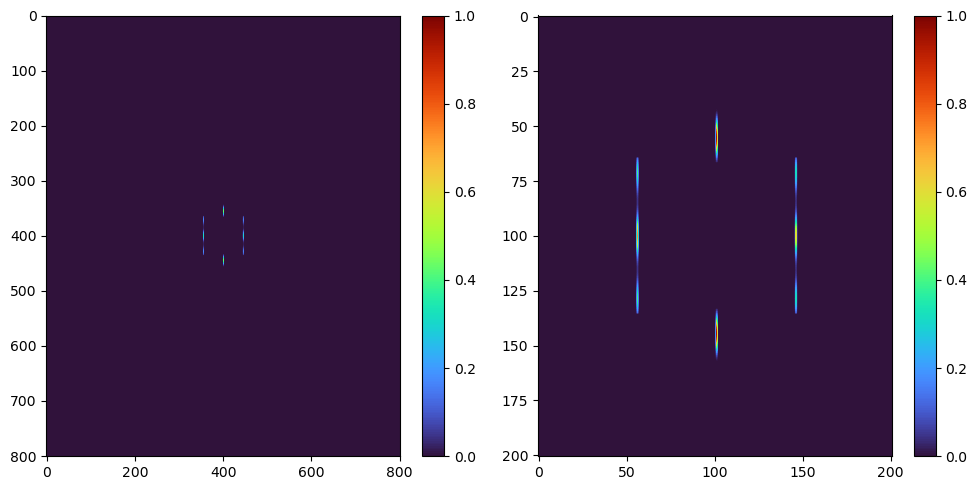

In [13]:
lattice_utils.plot_grid(data, data[300:501, 300:501], cmap="turbo", aspect="auto")

##### Finding the lattice intensity at the focal point by taking the FFT

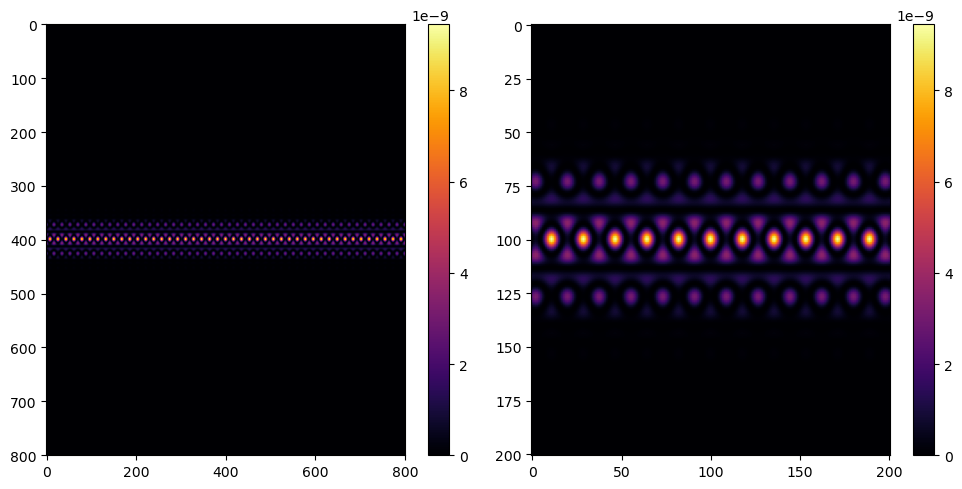

In [14]:
wavefront = fftshift(ifft2(data))
wavefront_intensity = np.abs(wavefront)**2
lattice_utils.plot_grid(wavefront_intensity, wavefront_intensity[300:501, 300:501], cmap="inferno", aspect="auto")

In [15]:
# save to arrays
np.save(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\wavefront_from_pupil.npy", wavefront)